# Check that ALICE environment is loaded

In [1]:
import os
if 'ALICE_ROOT' not in os.environ:
    print('Please restart after loading AliPhysics environment')
    exit(0)

# Import relevant libraries

In [2]:
import uproot
import matplotlib.pyplot as plt
from test_detector import compile_classes, test_detector


Welcome to JupyROOT 6.26/04


# Compile FAT tool classes (run me twice)

In [4]:
compile_classes()


Info in <ACLiC>: unmodified script has already been compiled and loaded
Info in <ACLiC>: unmodified script has already been compiled and loaded


# Perform variations

In [5]:
# define parameters for variations
efficiencies = [0.88, 0.93, 0.98]
single_layers = [[layer] for layer in range(1, 8)]
multiple_layers = [[1], [2], [3], [1, 2], [1, 3], [2, 3], [1, 2, 3]]

In [6]:
for eff in efficiencies:
    test_detector(0.14, f'outgrLayerEff{eff*100:.0f}', eff=eff) # pions

for layer in single_layers:
    test_detector(0.14, f'outgrLayerOff{layer[0]}', layerskill=layer) # pions

for iconf, layers in enumerate(multiple_layers):
    test_detector(0.14, f'outgrLayersOff{iconf}', layerskill=layers) # pions

ddd1
ddd2
ddd3
ddd4
ddd5
ddd6
ddd7
ddd1
ddd2
ddd3
ddd1
ddd2
ddd1
ddd3
ddd2
ddd3
ddd1
ddd2
ddd3
Detector ALICE: "ITS"
  Name 		 r [cm] 	  X0 	 xRho 	  phi & z res [um] layerEff 
0. vertex 	 0.00   	0.0000	0.0000	    -    -	  -
1. bpipe 	 1.60   	0.0022	0.0000	    -    -	  -
2. ddd1 	 1.80   	0.0005	0.0116	    6     6	0.88
3. foam1 	 1.80   	0.0008	0.0000	    -    -	  -
4. ddd2 	 2.40   	0.0005	0.0116	    6     6	0.88
5. foam2 	 2.40   	0.0008	0.0000	    -    -	  -
6. ddd3 	 3.00   	0.0005	0.0116	    6     6	0.88
7. foam3 	 3.00   	0.0008	0.0000	    -    -	  -
8. ddd4 	 19.40   	0.0035	0.1165	    6     6	0.88
9. ddd5 	 24.70   	0.0035	0.1165	    6     6	0.88
10. ddd6 	 35.30   	0.0035	0.1165	    6     6	0.88
11. ddd7 	 40.50   	0.0035	0.1165	    6     6	0.88
N ITS Layers: 7
Will test 50 tracks with 0.050000 < pt < 31.500000
PT=0.050000 2Rpt=66.666667 Rlr=40.500000
Number of active layers: 7, last Layer reached: 11
Mass of tracked particle: 0.140000 (at pt=   50 MeV)
Name   Radius Thickne

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas:

# Plot results

## Single-layer efficiency variation

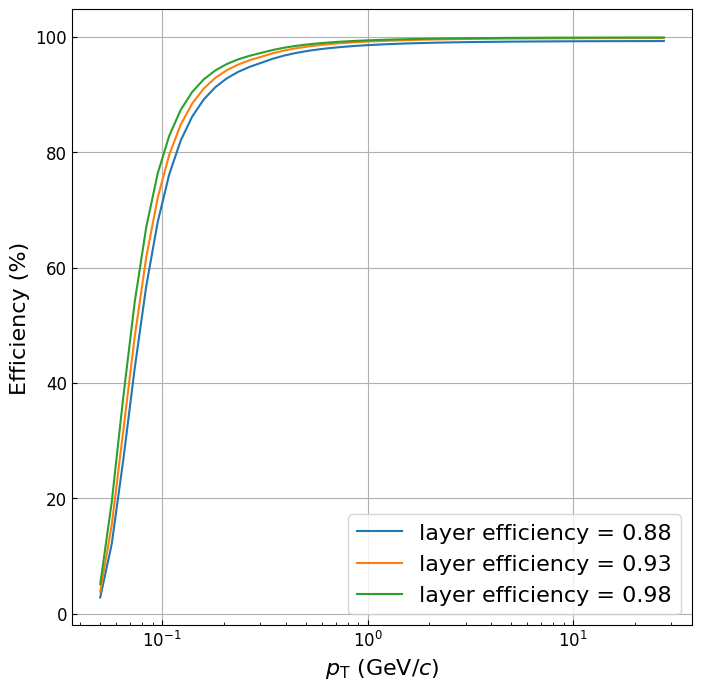

In [20]:
fig_eff = plt.figure(figsize=(8, 8))
plt.grid(True)
plt.tick_params(axis='both', which='both', direction="in", labelsize=12)
for eff in efficiencies:
    graph_eff = uproot.open(f'outgrLayerEff{eff*100:.0f}_ITS.root')['grEff1']
    plt.plot(graph_eff.values()[0], graph_eff.values()[1], label=f'layer efficiency = {eff}')
plt.xlabel(r'$p_\mathrm{T}$ (GeV/$c$)', size=16)
plt.ylabel('Efficiency (%)', size=16)
plt.xscale('log')
plt.legend(loc='best', fontsize=16)
plt.savefig('Single_layer_eff.pdf')

## Removal of a layer at a time

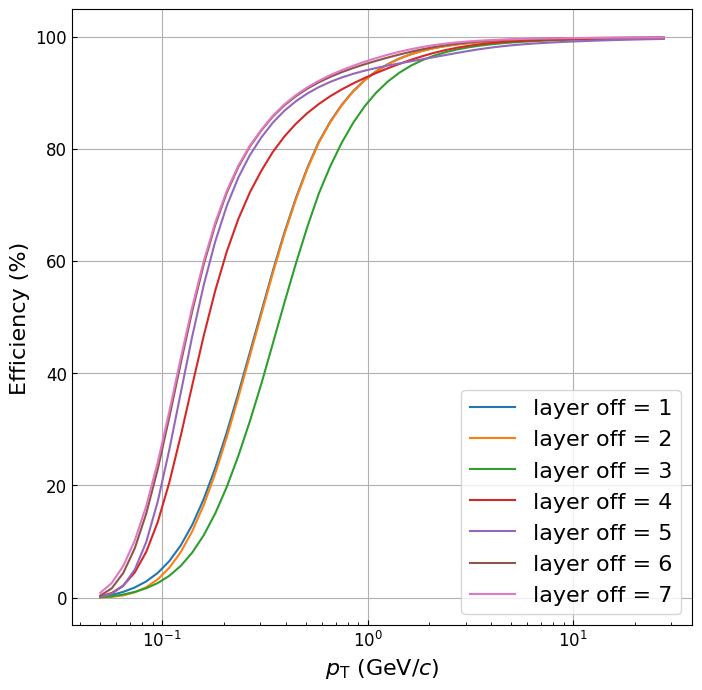

In [21]:
fig_layers = plt.figure(figsize=(8, 8))
plt.grid(True)
plt.tick_params(axis='both', which='both', direction="in", labelsize=12)
for layer in single_layers:
    graph_eff = uproot.open(f'outgrLayerOff{layer[0]}_ITS.root')['grEff1']
    plt.plot(graph_eff.values()[0], graph_eff.values()[1], label=f'layer off = {layer[0]}')
plt.xlabel(r'$p_\mathrm{T}$ (GeV/$c$)', size=16)
plt.ylabel('Efficiency (%)', size=16)
plt.xscale('log')
plt.legend(loc='best', fontsize=16)
plt.savefig('Single_layers_off.pdf')

## Removal of the three layers (all combinations)

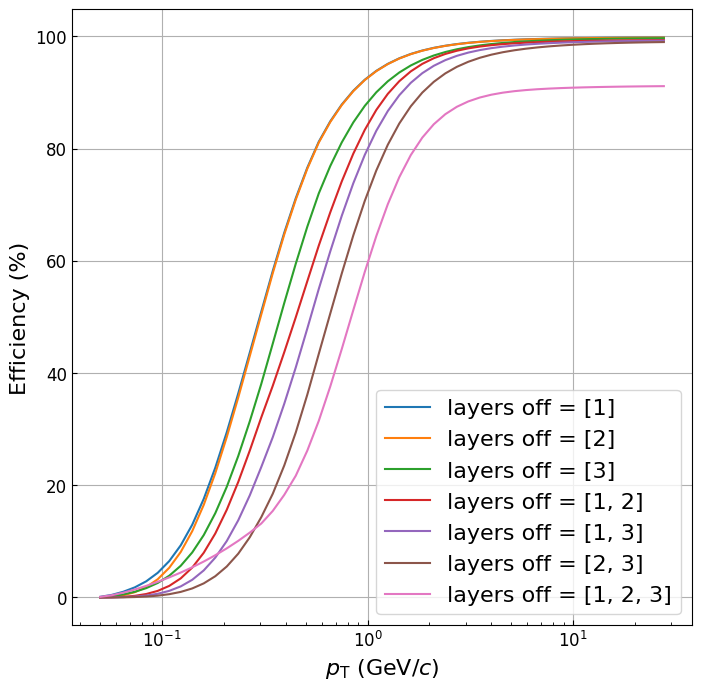

In [22]:
fig_layers = plt.figure(figsize=(8, 8))
plt.grid(True)
plt.tick_params(axis='both', which='both', direction="in", labelsize=12)
for iconf, layers in enumerate(multiple_layers):
    graph_eff = uproot.open(f'outgrLayersOff{iconf}_ITS.root')['grEff1']
    plt.plot(graph_eff.values()[0], graph_eff.values()[1], label=f'layers off = {layers}')
plt.xlabel(r'$p_\mathrm{T}$ (GeV/$c$)', size=16)
plt.ylabel('Efficiency (%)', size=16)
plt.xscale('log')
plt.legend(loc='best', fontsize=16)
plt.savefig('First_layers_off_allcomb.pdf')